# Cleaned Datasets

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
uber = pd.read_csv("uber.csv")
lyft = pd.read_csv("lyft.csv")

# Train the datasets

In [57]:
uber_X = uber[['distance','surge_multiplier','Fri', 'Sat','Sun',
               'UberPool','UberXL','Black','Black SUV', 'WAV', #Use UberX as base line
               ' Mostly Cloudy ', ' Rain ', ' Partly Cloudy ', #Use Clear as baseline
               ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
               ' Drizzle ']]
uber_y = uber['price']
lyft_X = lyft[['distance','surge_multiplier','Fri', 'Sat','Sun',
               'Shared','Lyft XL','Lux Black XL','Lux', 'Lux Black',
               ' Mostly Cloudy ', ' Rain ', ' Partly Cloudy ', 
               ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
               ' Drizzle ']]
lyft_y = lyft['price']

from sklearn.model_selection import train_test_split
#train test split
uber_X_train, uber_X_test, uber_y_train, uber_y_test = train_test_split(
    uber_X, uber_y, test_size=0.20, random_state=325)
#train test split
lyft_X_train, lyft_X_test, lyft_y_train, lyft_y_test = train_test_split(
    lyft_X, lyft_y, test_size=0.20, random_state=325)

# Linear Regression

Linear Regression Lyft train R squared: 0.9365
Linear Regression Lyft test R squared: 0.9363
Linear Regression Lyft test RMSE: 2.5324
LASSO Uber Accuracy: 84.99 %.


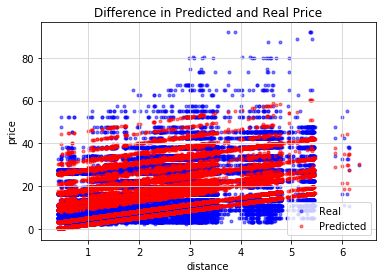

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

lr = LinearRegression() 
lm_model = lr.fit(lyft_X_train, lyft_y_train)
lyft_y_pred = lm_model.predict(lyft_X_test)
l_lr_train_r2 = lr.score(lyft_X_train, lyft_y_train)
l_lr_test_r2 = lr.score(lyft_X_test, lyft_y_test)
print('Linear Regression Lyft train R squared: %.4f' % l_lr_train_r2)
print('Linear Regression Lyft test R squared: %.4f' % l_lr_test_r2)

lyft_lr_mse = mean_squared_error(lyft_y_pred, lyft_y_test)
lyft_lr_rmse = np.sqrt(lyft_lr_mse)
print('Linear Regression Lyft test RMSE: %.4f' % lyft_lr_rmse)

errors = abs(lyft_y_pred - lyft_y_test)
mape = 100 * (errors / lyft_y_test)
lyft_lr_accuracy = 100 - np.mean(mape)
print('LASSO Uber Accuracy:', round(lyft_lr_accuracy, 2), '%.')

# Define x axis
x_axis = lyft_X_test.distance 

# Build scatterplot
plt.scatter(x_axis, lyft_y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, lyft_y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

Linear Regression Uber train R squared: 0.9200
Linear Regression Uber test R squared: 0.9188
Linear Regression Uber test RMSE: 2.4425
LASSO Uber Accuracy: 88.13 %.


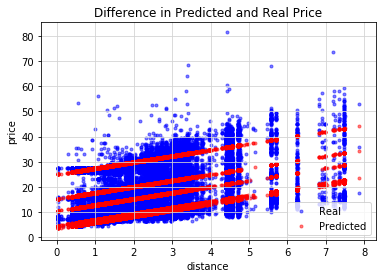

In [72]:
lr = LinearRegression() 
lm_model = lr.fit(uber_X_train, uber_y_train)
uber_y_pred = lm_model.predict(uber_X_test)
u_lr_train_r2 = lr.score(uber_X_train, uber_y_train)
u_lr_test_r2 = lr.score(uber_X_test, uber_y_test)
print('Linear Regression Uber train R squared: %.4f' % u_lr_train_r2)
print('Linear Regression Uber test R squared: %.4f' % u_lr_test_r2)

uber_lr_mse = mean_squared_error(uber_y_pred, uber_y_test)
uber_lr_rmse = np.sqrt(uber_lr_mse)
print('Linear Regression Uber test RMSE: %.4f' % uber_lr_rmse)

errors = abs(uber_y_pred - uber_y_test)
mape = 100 * (errors / uber_y_test)
uber_lr_accuracy = 100 - np.mean(mape)
print('LASSO Uber Accuracy:', round(uber_lr_accuracy, 2), '%.')

# Define x axis
x_axis = uber_X_test.distance 

# Build scatterplot
plt.scatter(x_axis, uber_y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, uber_y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

# LASSO

0.0033933817828508
LASSO Uber train R squared is: 0.9200
LASSO Uber test R squared is: 0.9187
LASSO Uber test RMSE: 2.4428
LASSO Uber Accuracy: 88.15 %.


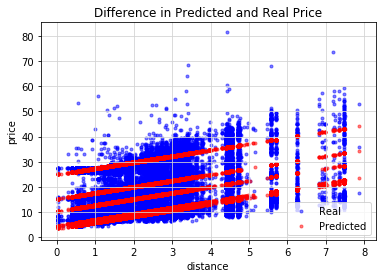

In [73]:
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#cv
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
uber_lasso_model = LassoCV(cv=cv)

#fit model
uber_lasso_model.fit(uber_X_train, uber_y_train)
uber_y_pred = uber_lasso_model.predict(uber_X_test)

#display lambda that produced the lowest test MSE
print(uber_lasso_model.alpha_)
u_lasso_train_r2 = uber_lasso_model.score(uber_X_train,uber_y_train)
u_lasso_test_r2 = uber_lasso_model.score(uber_X_test,uber_y_test)
print('LASSO Uber train R squared is: %.4f' % u_lasso_train_r2)
print('LASSO Uber test R squared is: %.4f' % u_lasso_test_r2)

uber_lasso_mse = mean_squared_error(uber_y_pred, uber_y_test)
uber_lasso_rmse = np.sqrt(uber_lasso_mse)
print('LASSO Uber test RMSE: %.4f' % uber_lasso_rmse)

errors = abs(uber_y_pred - uber_y_test)
mape = 100 * (errors / uber_y_test)
uber_lasso_accuracy = 100 - np.mean(mape)
print('LASSO Uber Accuracy:', round(uber_lasso_accuracy, 2), '%.')

# Define x axis
x_axis = uber_X_test.distance 

# Build scatterplot
plt.scatter(x_axis, uber_y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, uber_y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

0.0039235182772924355
LASSO Lyft train R squared is: 0.9365
LASSO Lyft test R squared is: 0.9363
LASSO test RMSE: 2.5329
LASSO Lyft Accuracy: 85.07 %.


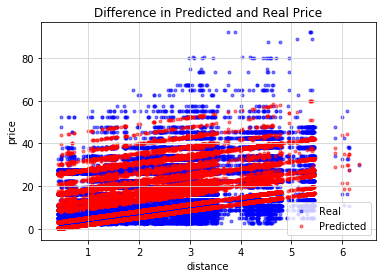

In [74]:
#cv
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
lyft_lasso_model = LassoCV(cv=cv)

#fit model
lyft_lasso_model.fit(lyft_X_train, lyft_y_train)
lyft_y_pred = lyft_lasso_model.predict(lyft_X_test)

#display lambda that produced the lowest test MSE
print(lyft_lasso_model.alpha_)
l_lasso_train_r2 = lyft_lasso_model.score(lyft_X_train,lyft_y_train)
l_lasso_test_r2 = lyft_lasso_model.score(lyft_X_test,lyft_y_test)
print('LASSO Lyft train R squared is: %.4f' % l_lasso_train_r2)
print('LASSO Lyft test R squared is: %.4f' % l_lasso_test_r2)

lyft_lasso_mse = mean_squared_error(lyft_y_pred, lyft_y_test)
lyft_lasso_rmse = np.sqrt(lyft_lasso_mse)
print('LASSO test RMSE: %.4f' % lyft_lasso_rmse)

errors = abs(lyft_y_pred - lyft_y_test)
mape = 100 * (errors / lyft_y_test)
lyft_lasso_accuracy = 100 - np.mean(mape)
print('LASSO Lyft Accuracy:', round(lyft_lasso_accuracy, 2), '%.')

# Define x axis
x_axis = lyft_X_test.distance 

# Build scatterplot
plt.scatter(x_axis, lyft_y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, lyft_y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

# Random Forest

Random Forest Lyft train R squared is: 0.9806
Random Forest Lyft test R squared": 0.9759
Random Forest Lyft RMSE: 1.5575
Random Forest Lyft Accuracy: 91.46 %.


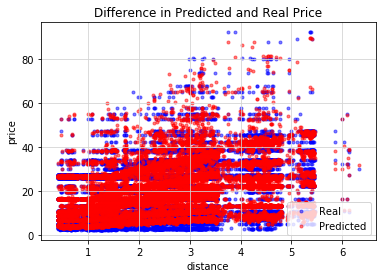

In [75]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 500, random_state = 42)
regr.fit(lyft_X_train, lyft_y_train)
l_rf_train_r2 = regr.score(lyft_X_train,lyft_y_train)
l_rf_test_r2 = regr.score(lyft_X_test, lyft_y_test)
print('Random Forest Lyft train R squared is: %.4f' % l_rf_train_r2)
print('Random Forest Lyft test R squared": %.4f' % l_rf_test_r2)

predictions = regr.predict(lyft_X_test)
l_forest_mse = mean_squared_error(predictions, lyft_y_test)
l_forest_rmse = np.sqrt(l_forest_mse)
print('Random Forest Lyft RMSE: %.4f' % forest_rmse)

errors = abs(predictions - lyft_y_test)
mape = 100 * (errors / lyft_y_test)
lyft_rf_accuracy = 100 - np.mean(mape)
print('Random Forest Lyft Accuracy:', round(lyft_rf_accuracy, 2), '%.')

'''characteristics = lyft_X.columns
importances = list(regr.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];'''

# Define x axis
x_axis = lyft_X_test.distance 

# Build scatterplot
plt.scatter(x_axis, lyft_y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

Random Forest Uber train R squared is: 0.9536
Random Forest Lyft test R squared": 0.9480
Random Forest Lyft RMSE: 1.9546
Random Forest Uber Accuracy: 91.79 %.


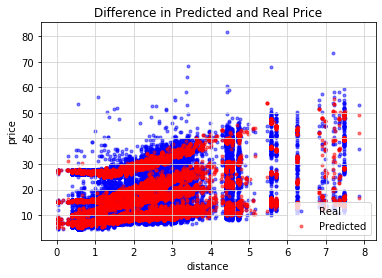

In [76]:
regr = RandomForestRegressor(n_estimators = 500, random_state = 42)
regr.fit(uber_X_train, uber_y_train)
u_rf_train_r2 = regr.score(uber_X_train,uber_y_train)
u_rf_test_r2 = regr.score(uber_X_test, uber_y_test)
print('Random Forest Uber train R squared is: %.4f' % u_rf_train_r2)
print('Random Forest Lyft test R squared": %.4f' % u_rf_test_r2)

predictions = regr.predict(uber_X_test)
u_forest_mse = mean_squared_error(predictions, uber_y_test)
u_forest_rmse = np.sqrt(u_forest_mse)
print('Random Forest Lyft RMSE: %.4f' % u_forest_rmse)

predictions = regr.predict(uber_X_test)
errors = abs(predictions - uber_y_test)
mape = 100 * (errors / uber_y_test)
uber_rf_accuracy = 100 - np.mean(mape)
print('Random Forest Uber Accuracy:', round(uber_rf_accuracy, 2), '%.')

'''characteristics = uber_X.columns
importances = list(regr.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];'''

# Define x axis
x_axis = uber_X_test.distance 

# Build scatterplot
plt.scatter(x_axis, uber_y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

# Gradient Boosting (GBR) 

Gradient Boosting Lyft train R squared is: 0.9721
Gradient Boosting Lyft test R squared": 0.9721
Gradient Boosting RMSE: 1.6775
Gradient Boosting Lyft Accuracy: 90.38 %.


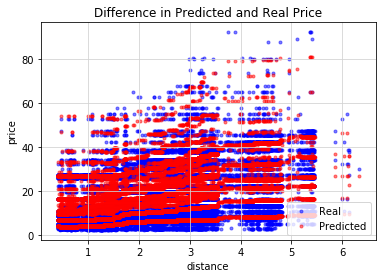

In [77]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
gbr = ensemble.GradientBoostingRegressor()
gbr.fit(lyft_X_train, lyft_y_train)
l_gbr_train_r2 = gbr.score(lyft_X_train,lyft_y_train)
l_gbr_test_r2 = gbr.score(lyft_X_test, lyft_y_test)
print('Gradient Boosting Lyft train R squared is: %.4f' % l_gbr_train_r2)
print('Gradient Boosting Lyft test R squared": %.4f' % l_gbr_test_r2)

y_pred = gbr.predict(lyft_X_test)
lyft_gbr_mse = mean_squared_error(y_pred, lyft_y_test)
lyft_gbr_rmse = np.sqrt(lyft_gbr_mse)
print('Gradient Boosting RMSE: %.4f' % lyft_gbr_rmse)

errors = abs(y_pred - lyft_y_test)
mape = 100 * (errors / lyft_y_test)
lyft_gbr_accuracy = 100 - np.mean(mape)
print('Gradient Boosting Lyft Accuracy:', round(lyft_gbr_accuracy, 2), '%.')

# Define x axis
x_axis = lyft_X_test.distance 

# Build scatterplot
plt.scatter(x_axis, lyft_y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

Gradient Boosting Uber train R squared is: 0.9475
Gradient Boosting Uber test R squared": 0.9475
Gradient Boosting RMSE: 1.9894
Gradient Boosting Uber Accuracy: 91.34 %.


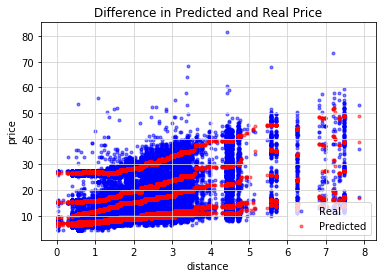

In [81]:
gbr = ensemble.GradientBoostingRegressor()
gbr.fit(uber_X_train, uber_y_train)
u_gbr_train_r2 = gbr.score(uber_X_train,uber_y_train)
u_gbr_test_r2 = gbr.score(uber_X_test, uber_y_test)
print('Gradient Boosting Uber train R squared is: %.4f' % u_gbr_train_r2)
print('Gradient Boosting Uber test R squared": %.4f' % u_gbr_train_r2)

y_pred = gbr.predict(uber_X_test)
uber_gbr_mse = mean_squared_error(y_pred, uber_y_test)
uber_gbr_rmse = np.sqrt(uber_gbr_mse)
print('Gradient Boosting RMSE: %.4f' % uber_gbr_rmse)

errors = abs(y_pred - uber_y_test)
mape = 100 * (errors / uber_y_test)
uber_gbr_accuracy = 100 - np.mean(mape)
print('Gradient Boosting Uber Accuracy:', round(uber_gbr_accuracy, 2), '%.')

# Define x axis
x_axis = uber_X_test.distance 

# Build scatterplot
plt.scatter(x_axis, uber_y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

# Summary table

In [84]:
lyft_data = {"Model": ["Linear Regression", "LASSO", "Random Forest", "Gradient Boosting"], 
"Train R2": [l_lr_train_r2, l_lasso_train_r2, l_rf_train_r2, l_gbr_train_r2],
"Test R2": [l_lr_test_r2, l_lasso_test_r2, l_rf_test_r2, l_gbr_test_r2],
"Test RMSE": [lyft_lr_rmse, lyft_lasso_rmse, l_forest_rmse, lyft_gbr_rmse],
"Accuracy": [lyft_lr_accuracy, lyft_lasso_accuracy, lyft_rf_accuracy, lyft_gbr_accuracy]}

uber_data = {"Model": ["Linear Regression", "LASSO", "Random Forest", "Gradient Boosting"], 
"Train R2": [u_lr_train_r2, u_lasso_train_r2, u_rf_train_r2, u_gbr_train_r2],
"Test R2": [u_lr_test_r2, u_lasso_test_r2, u_rf_test_r2, u_gbr_test_r2],
"Test RMSE": [uber_lr_rmse, uber_lasso_rmse, u_forest_rmse, uber_gbr_rmse],
"Accuracy": [uber_lr_accuracy, uber_lasso_accuracy, uber_rf_accuracy, uber_gbr_accuracy]}

lyft_summary_table = pd.DataFrame(lyft_data)
display(lyft_summary_table)
uber_summary_table = pd.DataFrame(uber_data)
display(uber_summary_table)

,Model,Train R2,Test R2,Test RMSE,Accuracy
0,Linear Regression,0.936489,0.936337,2.532400,84.991037
1,LASSO,0.936467,0.936314,2.532864,85.074152
2,Random Forest,0.980563,0.975919,1.557498,91.459741
3,Gradient Boosting,0.972095,0.972065,1.677504,90.383751


,Model,Train R2,Test R2,Test RMSE,Accuracy
0,Linear Regression,0.920045,0.918768,2.442493,88.128347
1,LASSO,0.920037,0.918747,2.442811,88.154933
2,Random Forest,0.953556,0.947979,1.954609,91.342962
3,Gradient Boosting,0.947501,0.946112,1.989371,91.342962


Based on different metrics, we can conclude that the Random Forest model is the best model and thus we could consider this as our final model. 